This Study is to evalute the trends and identify the pattern of the sales data of the new energy vehicel since 2015.
    The dataset contain the car sales data of different models at the monthly level.

In [1]:
import pandas as pd
df=pd.read_excel("sales data.xlsx")
display(df)

,年份,月份,厂商,车型,售价（万元）,销量
0,2015,1,众泰新能源,众泰Z500新能源,0.00 - 0.00,3309
1,2015,1,一汽丰田,普锐斯,0.00 - 0.00,2352
2,2015,1,比亚迪,比亚迪e6,0.00 - 0.00,423
3,2015,1,上汽集团,荣威e550,0.00 - 0.00,348
4,2015,1,众泰新能源,云100,0.00 - 0.00,184
...,...,...,...,...,...,...
15436,2025,6,东风新能源,富康ES600,15.38 - 16.38,1
15437,2025,6,长安凯程,长安之星9EV,13.28 - 16.89,1
15438,2025,6,比亚迪,宋MAX新能源,14.78 - 17.48,1
15439,2025,6,东风日产,启辰D60EV,12.98 - 17.88,1


## Exploritory Analysis

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年份      15441 non-null  int64 
 1   月份      15441 non-null  int64 
 2   厂商      15441 non-null  object
 3   车型      15441 non-null  object
 4   售价（万元）  15441 non-null  object
 5   销量      15441 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 723.9+ KB


,年份,月份,销量
count,15441.000000,15441.000000,15441.000000
mean,2022.075708,6.452626,2281.217991
std,2.202926,3.452468,5469.122163
min,2015.000000,1.000000,0.000000
25%,2021.000000,4.000000,64.000000
50%,2022.000000,6.000000,442.000000
75%,2024.000000,9.000000,1968.000000
max,2025.000000,12.000000,73009.000000


In [3]:
df['厂商'].value_counts()
df['售价（万元）'].value_counts()
df[df['销量']==df['销量'].max()]

,年份,月份,厂商,车型,售价（万元）,销量
7679,2022,12,上汽通用五菱,宏光MINIEV,3.28 - 9.99,73009


The car model which had the highiest sales was 上汽通用五菱宏光MINIEV in Dec 2022. Based on other infomation I got, Dec 2022 was the last month that government offer subsidy for people purchasing EV. This is probably why the sales was highest in Dec 2022. To explore further and verify if the sales of other cars are also comparably high, we will compare the overall monthly sales data of each year.

In [4]:
#yearly wise
import matplotlib.pyplot as plt
df_yearly=df.groupby("年份")["销量"].sum().reset_index()

In [5]:
df_yearly
#As the data is as of 2025.06, so the yearly sum sale of 2025 data is incomplelete, we use this data times 2 to roughly estimate the entire yearly data of 2025
df_yearly.loc[df_yearly['年份']==2025,'销量']=5278740*2

In [6]:
df_yearly

,年份,销量
0,2015,120967
1,2016,151880
2,2017,388454
3,2018,772921
4,2019,900282
5,2020,1050744
6,2021,2800616
7,2022,6081231
8,2023,7192921
9,2024,10485531


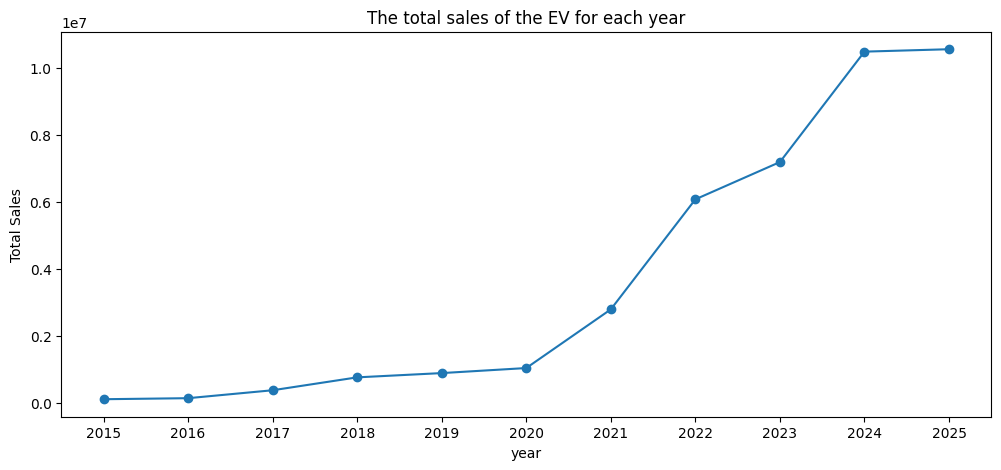

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df_yearly["年份"],df_yearly["销量"],marker='o')
plt.xticks(df_yearly["年份"])
plt.ylabel("Total Sales")
plt.xlabel("year")
plt.title("The total sales of the EV for each year")
plt.show()

The total number of sales has been progressively increasing over time, now, to verify previous-mentioned subsidy withdrawl policy, we will examine the trend at the month level in 2022

In [8]:
#extract 2022 data
df_2022=df[df['年份']==2022]
df_2022_mon=df_2022.groupby("月份")["销量"].sum().reset_index()
df_2022_mon

,月份,销量
0,1,393767
1,2,306153
2,3,435401
3,4,272764
4,5,391117
5,6,531545
6,7,531404
7,8,604868
8,9,631306
9,10,620788


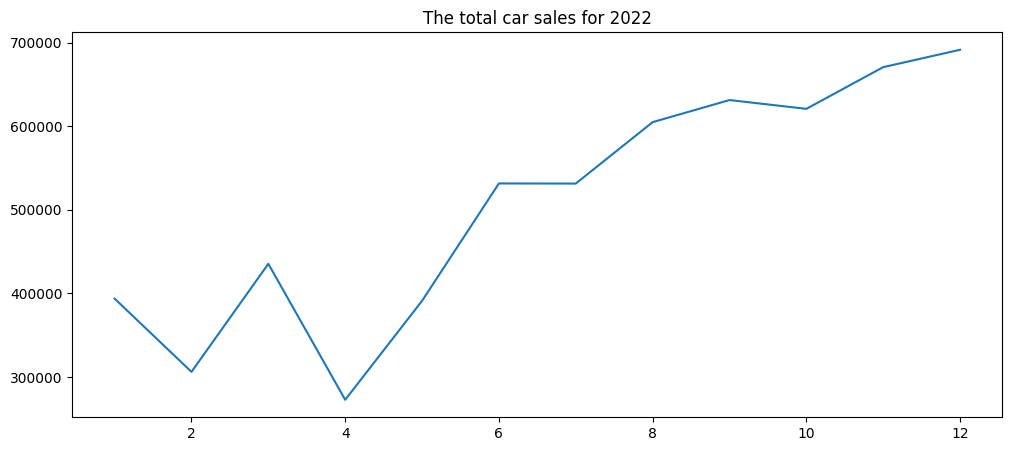

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df_2022_mon['月份'],df_2022_mon['销量'])
plt.title("The total car sales for 2022")
plt.show()


Seems like Dec 2022 has the highest total sales, to confirm this was due to the upcoming withdraw of the subsidy policy and not because of the chorologically increasing sales, we will examine another year.

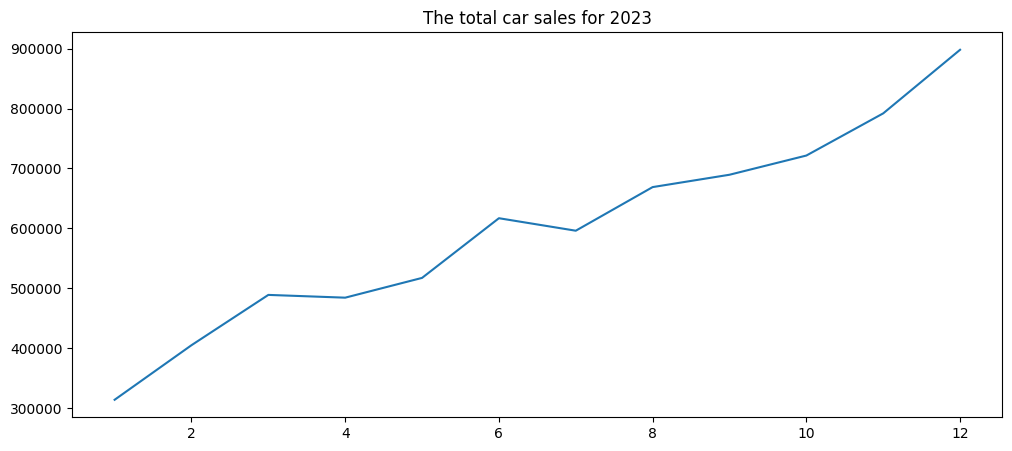

In [10]:
df_2023=df[df['年份']==2023]
df_2023_mon=df_2023.groupby("月份")["销量"].sum().reset_index()
df_2023_mon
plt.figure(figsize=(12,5))
plt.plot(df_2023_mon['月份'],df_2023_mon['销量'])
plt.title("The total car sales for 2023")
plt.show()

Seems like Dec has the highest amount is a common pattern across years, so we can say the withdraw policy in Dec 2022 was not the reason to account for the highest sales record of that 五菱宏光 model.

## Time Series Analysis

In [11]:
df['date'] = pd.to_datetime(df['年份'].astype(str) + '-' + df['月份'].astype(str) + '-01')
df_monthly=df.groupby("date")['销量'].sum().reset_index()
df_monthly

,date,销量
0,2015-01-01,6646
1,2015-02-01,4922
2,2015-03-01,7021
3,2015-04-01,6677
4,2015-05-01,6992
...,...,...
121,2025-02-01,661011
122,2025-03-01,970643
123,2025-04-01,876663
124,2025-05-01,985497


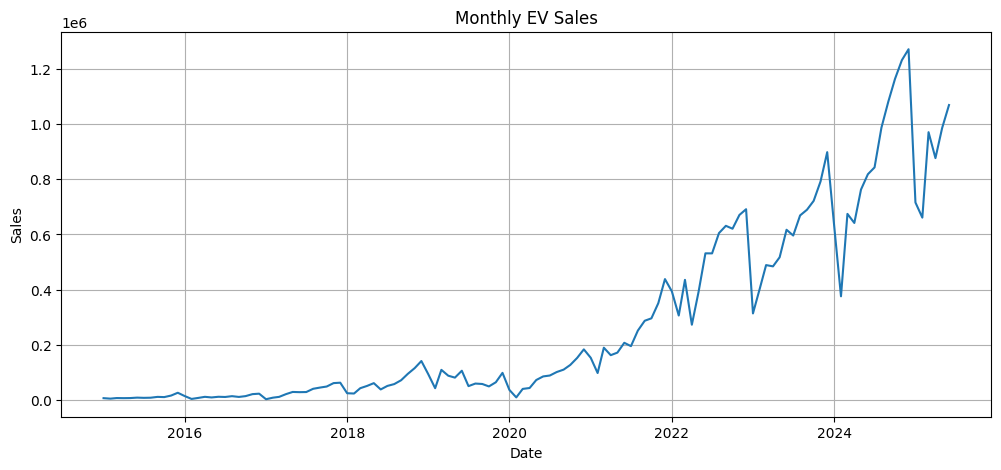

In [12]:
# line plot
plt.figure(figsize=(12,5))
plt.plot(df_monthly["date"],df_monthly["销量"])
plt.title("Monthly EV Sales")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)

In [13]:
monthly_ts = df_monthly.set_index('date')['销量']
monthly_ts
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    126 non-null    datetime64[ns]
 1   销量      126 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [14]:
df_monthly = df_monthly.set_index('date').sort_index()


In [15]:
df_monthly

,销量
date,
2015-01-01,6646
2015-02-01,4922
2015-03-01,7021
2015-04-01,6677
2015-05-01,6992
...,...
2025-02-01,661011
2025-03-01,970643
2025-04-01,876663


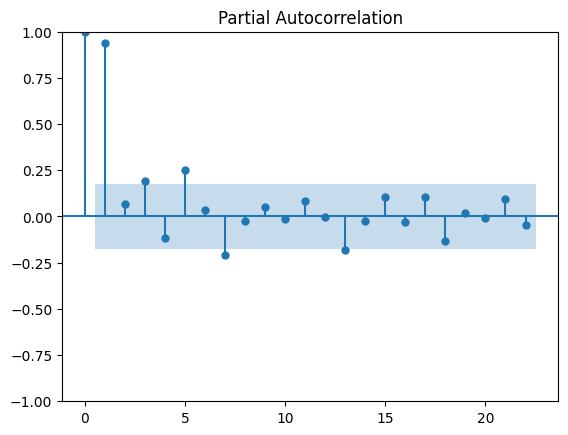

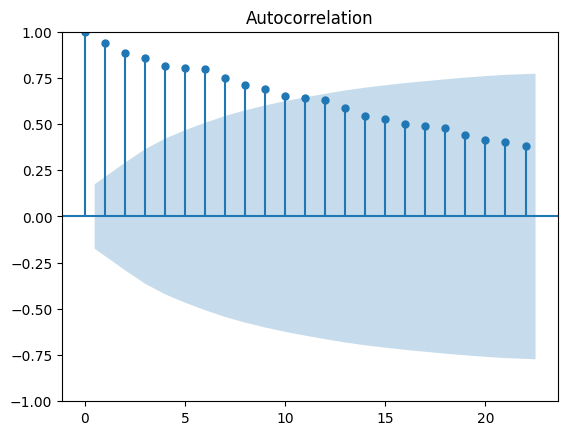

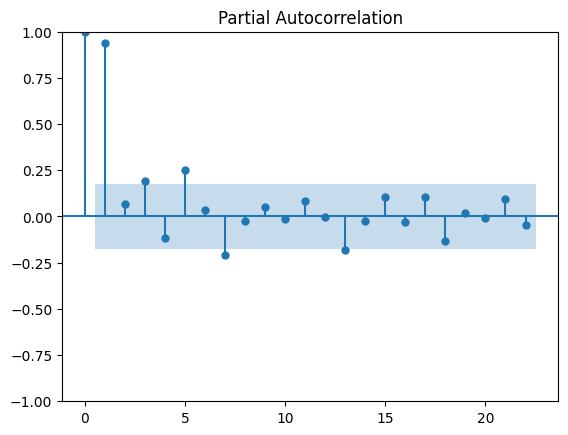

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_monthly['销量'])
plot_pacf(df_monthly['销量'])

The above PACF and ACF plot showcasing the high correlation between lag and lag-1, and there is no clear seasonality spotted. Besides, this time series is clearly a non-stationary series, so considering using differencing term= 1 when building ARIMA model

To choose the p term and q term in the model, we first have to create a differecing series of the orginal series to see if it would become stationary

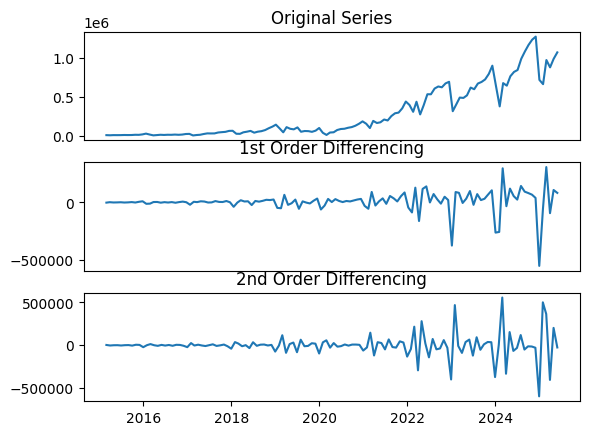

In [17]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_monthly['销量']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_monthly['销量'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_monthly['销量'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

As we can see, it has more noise after adding second order of the differencing term. So the ideal d =1

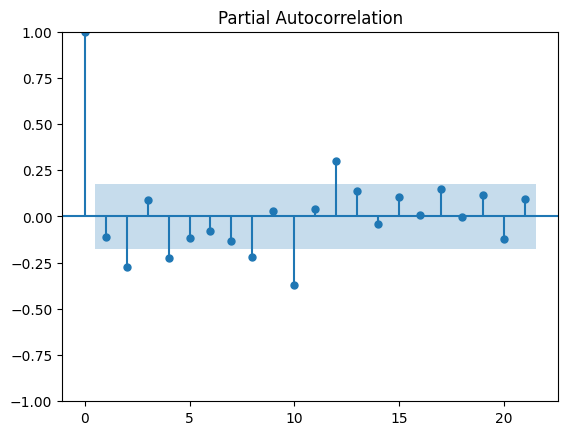

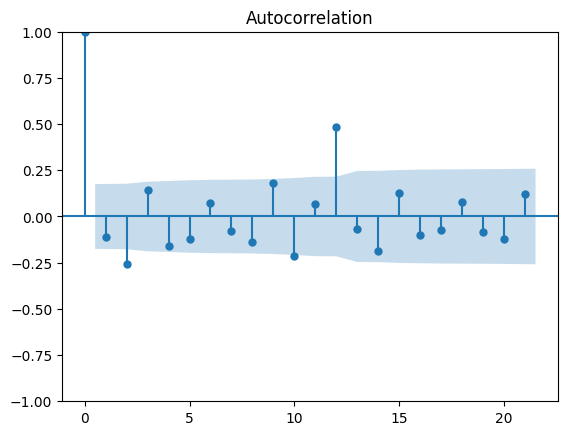

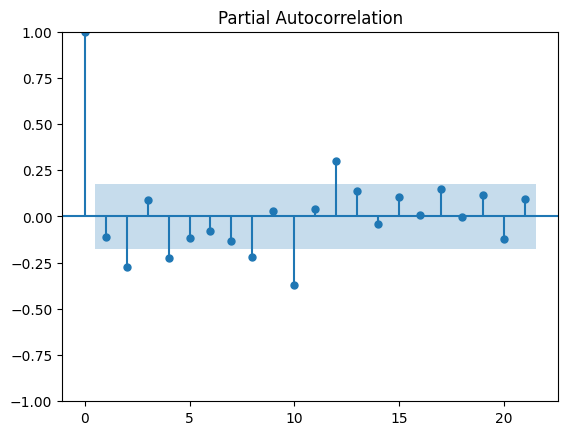

In [18]:
plot_acf(df_monthly['销量'].diff().dropna())
plot_pacf(df_monthly['销量'].diff().dropna())

Based on the above plot, there seems to be no autocorrelation (not even between lag n and lag n-1) of the data, so it is very challenging to use this serise to build model to predict the future series.

## Market share analysis
This section is to assess the market share of each brand over time

In [19]:
df["厂商"].value_counts()

厂商
比亚迪         1309
上汽集团         698
上汽通用五菱       445
长安汽车         439
蔚来           393
            ... 
东南汽车           4
北京越野           4
起亚(进口)         4
广汽菲克Jeep       2
一汽吉林           2
Name: count, Length: 133, dtype: int64

In [20]:
df_brand_yearly=df.groupby(["年份","厂商"])["销量"].sum().reset_index()
df_brand_yearly

,年份,厂商,销量
0,2015,一汽丰田,42928
1,2015,上汽集团,10921
2,2015,东风日产,1127
3,2015,众泰新能源,32870
4,2015,比亚迪,26294
...,...,...,...
647,2025,长安马自达,6359
648,2025,阿维塔科技,53975
649,2025,零跑汽车,191465
650,2025,领克,75743


In [25]:
# To calculate the market share of each year, first need to match the yearly total sales to each row
df_merge=df_brand_yearly.merge(df_yearly,how='left',on="年份")
df_merge

,年份,厂商,销量_x,销量_y
0,2015,一汽丰田,42928,120967
1,2015,上汽集团,10921,120967
2,2015,东风日产,1127,120967
3,2015,众泰新能源,32870,120967
4,2015,比亚迪,26294,120967
...,...,...,...,...
647,2025,长安马自达,6359,10557480
648,2025,阿维塔科技,53975,10557480
649,2025,零跑汽车,191465,10557480
650,2025,领克,75743,10557480


In [26]:
df_merge["Market share"]=df_merge["销量_x"]/df_merge["销量_y"]
df_merge

,年份,厂商,销量_x,销量_y,Market share
0,2015,一汽丰田,42928,120967,0.354874
1,2015,上汽集团,10921,120967,0.090281
2,2015,东风日产,1127,120967,0.009317
3,2015,众泰新能源,32870,120967,0.271727
4,2015,比亚迪,26294,120967,0.217365
...,...,...,...,...,...
647,2025,长安马自达,6359,10557480,0.000602
648,2025,阿维塔科技,53975,10557480,0.005112
649,2025,零跑汽车,191465,10557480,0.018135
650,2025,领克,75743,10557480,0.007174


In [30]:
# As the label is in chinese character, below codes are runining to ensure pie chart showing chinese label
plt.rcParams['font.sans-serif'] = ['SimHei']        # 中文字体
plt.rcParams['axes.unicode_minus'] = False  

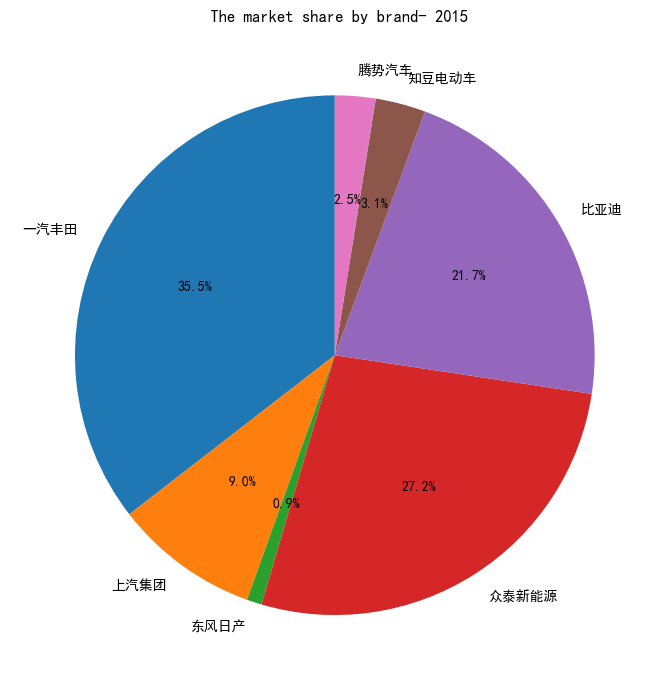

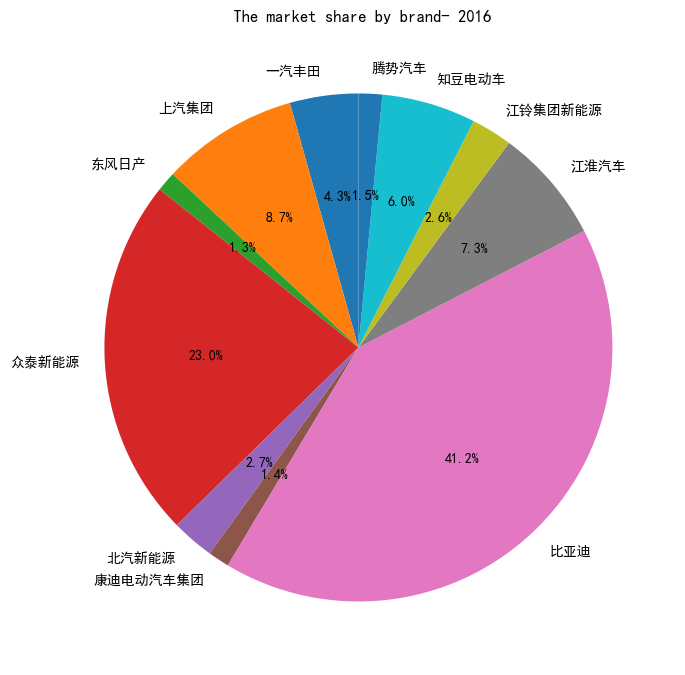

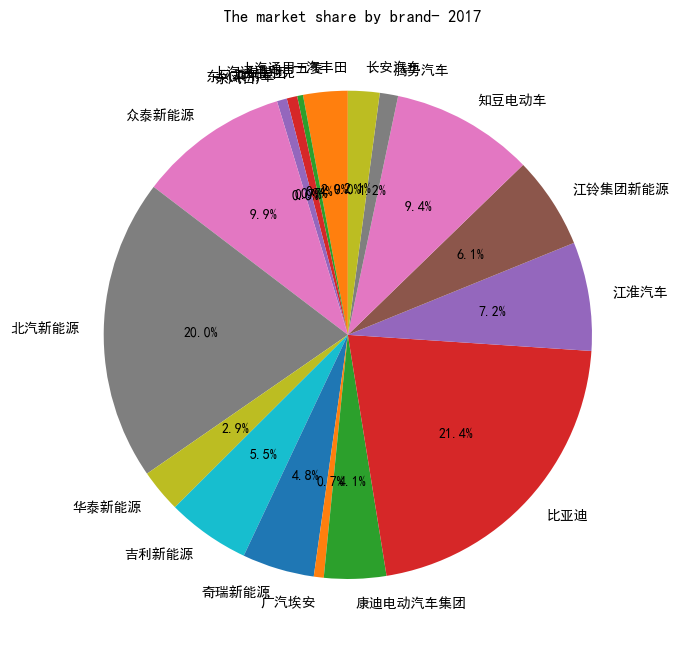

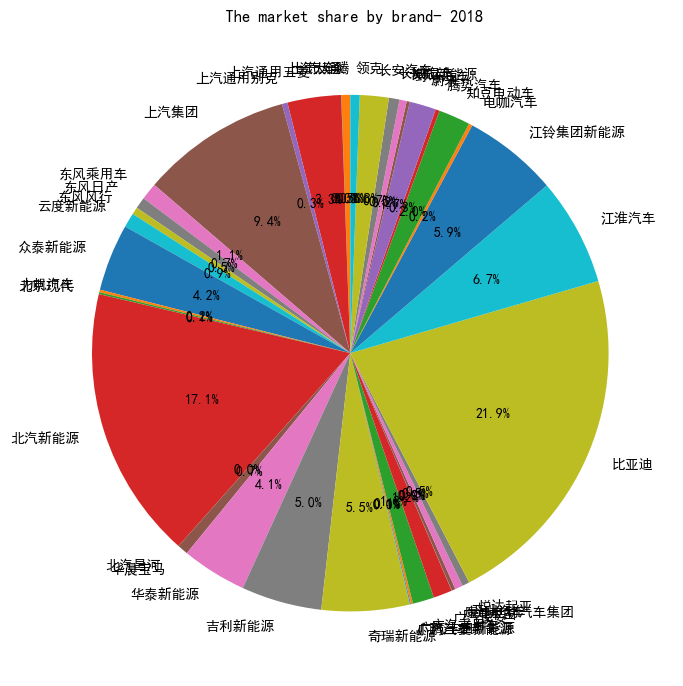

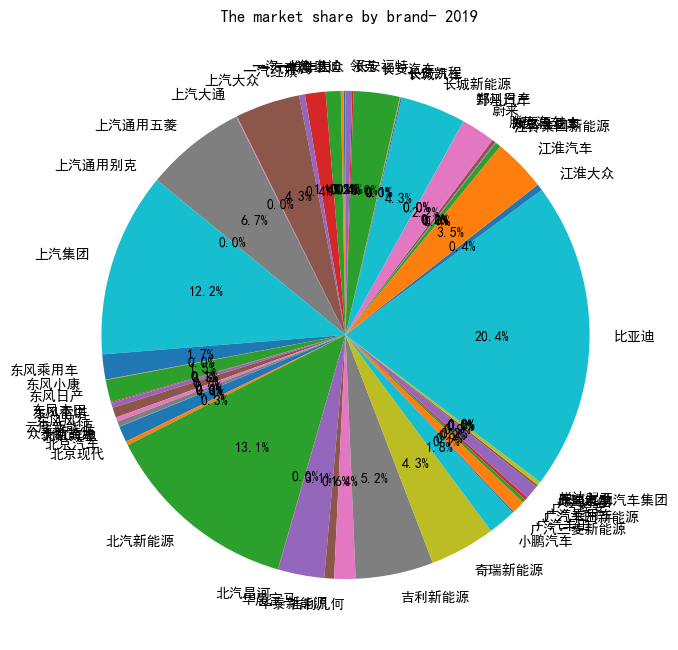

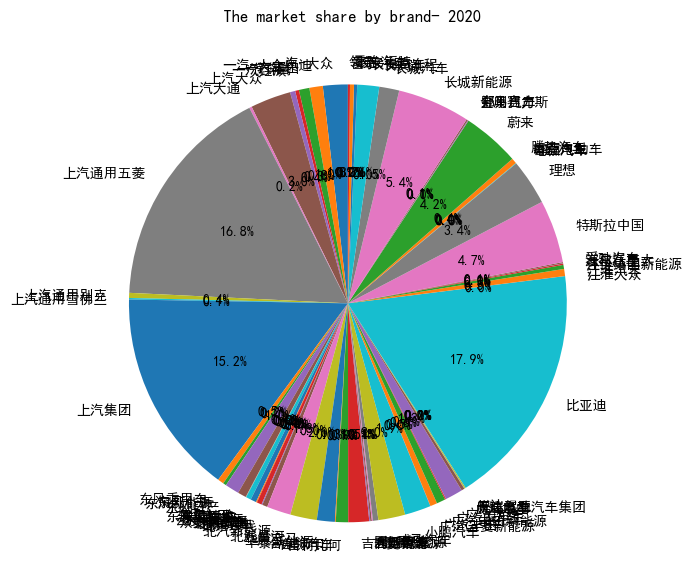

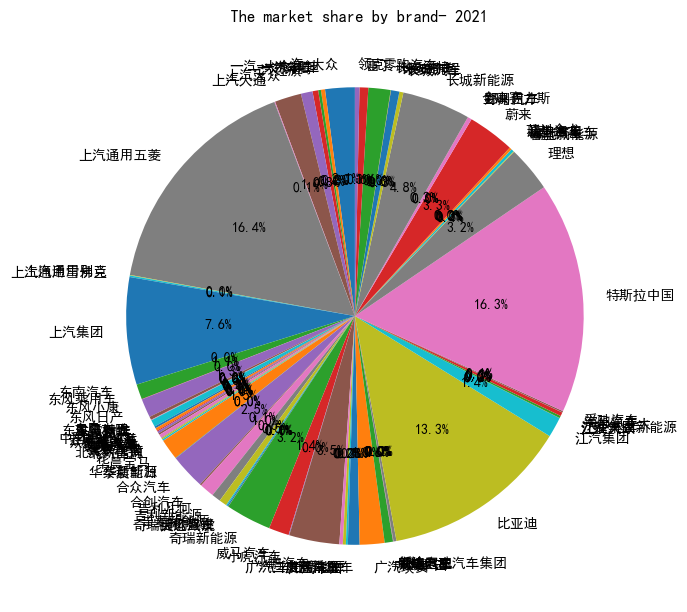

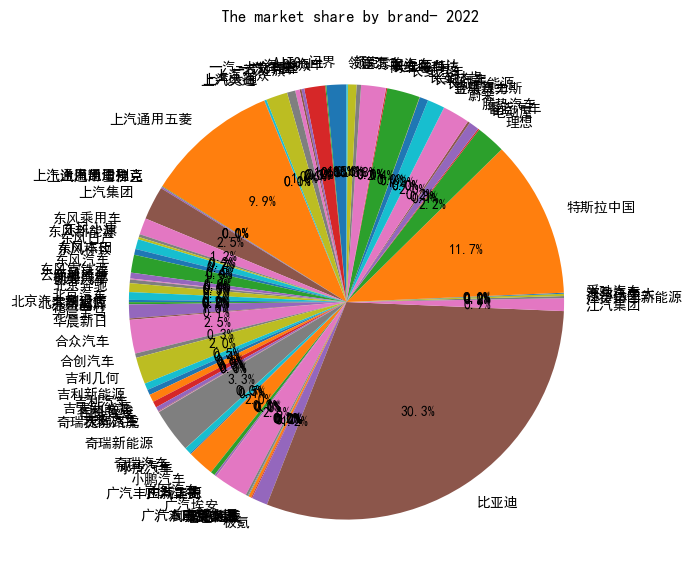

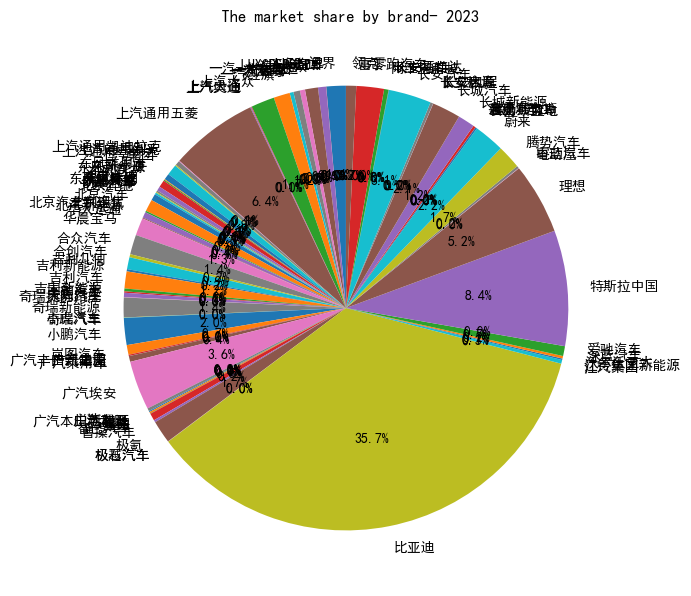

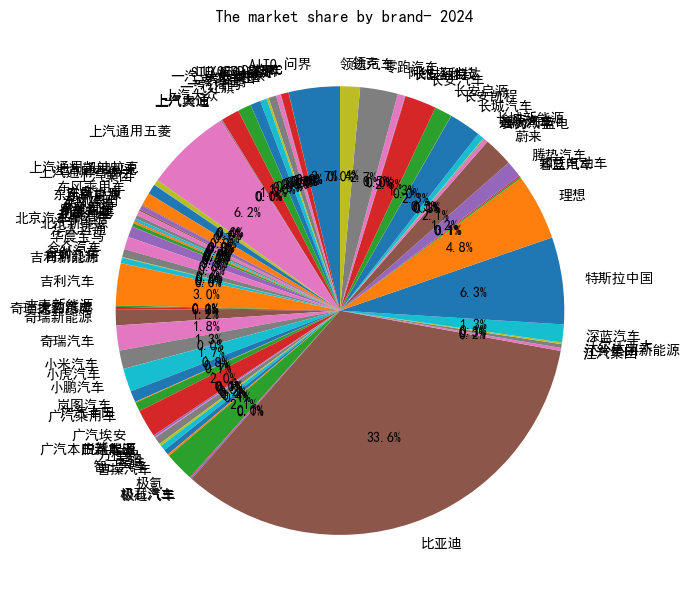

In [31]:
#Plot the market share on pie chart
for yr in range(2015,2025):
    df_sub=df_merge[df_merge["年份"]==yr]
    plt.figure(figsize=(7, 7))
    plt.pie(
        df_sub['Market share'],
        labels=df_sub['厂商'],
        autopct='%1.1f%%',
        startangle=90
    )
    
    plt.title(f" The market share by brand- {yr}")
    plt.tight_layout()
    plt.show()
    


Above pie charts from 2015 to 2024 showcased that BYD holds the highest market share of the EV over time